In [21]:
import sklearn
sklearn.__version__

'1.2.0'

In [22]:
import pandas as pd   
from matplotlib import pyplot
from numpy import mean
import time


from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

import warnings 
warnings.filterwarnings('ignore')

In [23]:
df1 = pd.read_csv("default_cc.csv")
df1.head()

,ID,LIMIT_BAL,Gender,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [24]:
df1.shape

(30000, 25)

In [25]:
df1 = pd.read_csv("default_cc.csv")

# Changed Gender from int64 to str
df1['Gender'] = df1['Gender'].astype('str')

# Changed EDUCATION from int64 to str
df1['EDUCATION'] = df1['EDUCATION'].astype('str')

# Changed MARRIAGE from int64 to str
df1['MARRIAGE'] = df1['MARRIAGE'].astype('str')

# Deleted column ID from df1
df1.drop(['ID'], axis=1, inplace=True)

In [26]:
df1.dtypes

LIMIT_BAL                      int64
Gender                        object
EDUCATION                     object
MARRIAGE                      object
AGE                            int64
PAY_0                          int64
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month     int64
dtype: object

In [27]:
df_onehot = pd.get_dummies(df1)
df_onehot.dtypes

LIMIT_BAL                     int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
Gender_1                       bool
Gender_2                       bool
EDUCATION_0                    bool
EDUCATION_1                    bool
EDUCATION_2                    bool
EDUCATION_3                    bool
EDUCATION_4                 

In [28]:
X = df_onehot.loc[:, df_onehot.columns != 'default payment next month']
y = df_onehot[['default payment next month']]

In [29]:
# print the distribution of y
print(y['default payment next month'].value_counts())

default payment next month
0    23364
1     6636
Name: count, dtype: int64


In [ ]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)

In [31]:
dt_5_2 = DecisionTreeClassifier(max_depth=5)  
dt_5_2.fit(trainX,trainy)
#fit_model(dt_5_2, "Depth 5 Split 2") 
md_probs = dt_5_2.predict_proba(testX)


In [32]:
md_probs

array([[0.83539765, 0.16460235],
       [0.90830883, 0.09169117],
       [0.90830883, 0.09169117],
       ...,
       [0.90830883, 0.09169117],
       [0.83539765, 0.16460235],
       [0.32053571, 0.67946429]])

In [33]:
md_probs = md_probs[:,1]
md_probs

array([0.16460235, 0.09169117, 0.09169117, ..., 0.09169117, 0.16460235,
       0.67946429])

In [34]:
md_auc = roc_auc_score(testy, md_probs)
md_auc

0.7554549890035509

In [35]:
def fit_model(model, model_name):
    model.fit(trainX,trainy)
    md_probs = model.predict_proba(testX)
    md_probs = md_probs[:,1]
    md_auc = roc_auc_score(testy, md_probs)
    print(model_name, " : ", md_auc)
    md_fpr, md_tpr, _ = roc_curve(testy, md_probs)
    pyplot.plot(md_fpr, md_tpr, marker='.', label=model_name)
    #return (md_fpr, md_tpr)

Depth 5 Split 2  :  0.7536684292183866
Depth 7 Split 2  :  0.753332853786026
Depth 5 Split 5  :  0.7536642295900214
Depth 7 Split 5  :  0.752854311517951
Depth 3 Split 2  :  0.7315391874860551
Depth 3 Split 5  :  0.7315391874860551


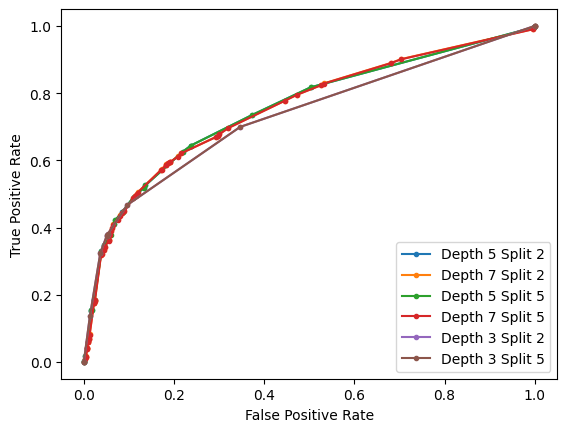

In [39]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3)#, random_state=2)
dt_5_2 = DecisionTreeClassifier(max_depth=5)  
fit_model(dt_5_2, "Depth 5 Split 2") 

dt_7_2 = DecisionTreeClassifier(max_depth=7)  
fit_model(dt_7_2, "Depth 7 Split 2") 

dt_5_5 = DecisionTreeClassifier(max_depth=5, min_samples_split=5)  
fit_model(dt_5_5, "Depth 5 Split 5") 

dt_7_5 = DecisionTreeClassifier(max_depth=7, min_samples_split=5)  
fit_model(dt_7_5, "Depth 7 Split 5") 

dt_3_2 = DecisionTreeClassifier(max_depth=3, min_samples_split=2)  
fit_model(dt_3_2, "Depth 3 Split 2") 

dt_3_5 = DecisionTreeClassifier(max_depth=3, min_samples_split=5)  
fit_model(dt_3_5, "Depth 3 Split 5") 

#kn = KNeighborsClassifier(n_neighbors=5)
#fit_model(kn, "k-NN")

#pipe_kn = Pipeline([("scaler", MinMaxScaler()), ("knr", KNeighborsClassifier(n_neighbors=5))])
#fit_model(pipe_kn, "Scaled k-NN")

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [43]:
def fitting_models_CV2():
    cv = RepeatedKFold(n_splits=10, n_repeats=2)#, random_state=1)
    
    dt_5_2 = DecisionTreeClassifier(max_depth=5)  
    dt_7_2 = DecisionTreeClassifier(max_depth=7)  
    dt_5_5 = DecisionTreeClassifier(max_depth=5, min_samples_split=5)  
    dt_7_5 = DecisionTreeClassifier(max_depth=7, min_samples_split=5)  
    #kn = KNeighborsClassifier(n_neighbors=5)
    #pipe_kn = Pipeline([("scaler", MinMaxScaler()), 
    #                     ("knr", KNeighborsClassifier(n_neighbors=5))])
    clfs = [('Depth 5 Split 2', dt_5_2),        
        ('Depth 7 Split 2', dt_7_2),        
        ('Depth 5 Split 5', dt_5_5),
        ('Depth 7 Split 5', dt_7_5)
        #('KNearest Neighbor',kn),
        #('Scaled KNearest',pipe_kn)       
    ]
    for name,clf in clfs:
        start = time.perf_counter()
        #scores = cross_val_score(clf, X, y, scoring="accuracy", cv=cv) 
        scores = cross_val_score(clf, X, y, scoring="roc_auc", cv=cv, n_jobs=-1) 
        end = time.perf_counter()        
        score = format(mean(scores), '.4f')
        duration = format((end-start),'.4f')
        print("{} : {} - {}".format(name,score,duration))

In [44]:
fitting_models_CV2()

Depth 5 Split 2 : 0.7547 - 0.6524
Depth 7 Split 2 : 0.7525 - 0.8789
Depth 5 Split 5 : 0.7559 - 0.7828
Depth 7 Split 5 : 0.7563 - 0.7419


In [48]:
%%timeit -n1 -r1
parameters = {     
                'min_samples_split' : [2,5,8, 10],#,400],
                'max_depth'    : [3,5,7,9,11],
                
                }
dt = DecisionTreeClassifier()
cv = RepeatedKFold(n_splits=10, n_repeats=1)#, random_state=1)
grid_search = GridSearchCV(dt, parameters, cv=cv, n_jobs=-1, scoring='roc_auc',verbose=2)#, refit=False)
grid_search.fit(X, y)
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
DecisionTreeClassifier(max_depth=7, min_samples_split=10)
0.755399670634257
{'max_depth': 7, 'min_samples_split': 10}
5.15 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [49]:
from sklearn.neighbors import KNeighborsClassifier

k-NN  :  0.599651653390098
Scaled k-NN  :  0.697127827498506


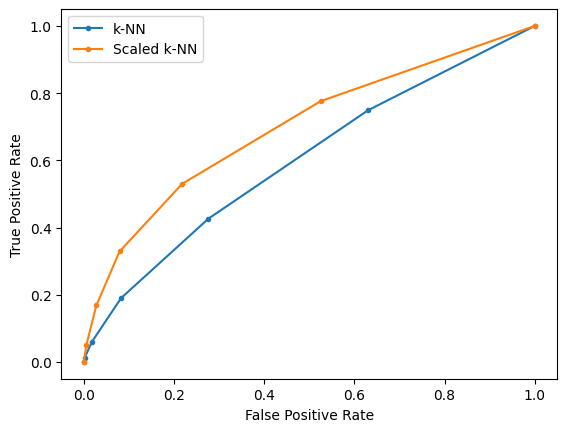

In [50]:
kn = KNeighborsClassifier(n_neighbors=5)
fit_model(kn, "k-NN")

pipe_kn = Pipeline([("scaler", MinMaxScaler()), ("knr", KNeighborsClassifier(n_neighbors=5))])
fit_model(pipe_kn, "Scaled k-NN")

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()